# Mapping The Television Mega-Text 

## Episode 01 - Working Class Content in the Action Adventure Genre

This notebook records our preliminary analysis of working-class content in programs from the action adventure genre over the course of the 1950s. Commentary and explanation on analytical methods and process will be provided throughout.

Once we have published the dataset, and this notebook on github, television scholars will be able to reproduce our research, and launch studies of their own.


In [1]:
## To begin we import the pandas data analysis package for python3 as "pd"

import pandas as pd
import numpy as np
from pandas import DataFrame

In [2]:
## we will also import the matplotlib package which will be used to create our visualizations later on

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Next, we use pandas command read_csv to read our primary dataframe of nineteen fifties television into juptyer

df=pd.read_csv("/Users/user/Desktop/megaText/analysis/frames.csv", index_col=0)

### The Data Frame

We've designated the data from this .csv file, as "df" to denote our primary data frame. 

Our data frame contains 14 different series, and drawn together from a combination of sources including imdb.com, and Vincent Terrace's *Encyclopedia of Television*.

In the data frame, these series are displayed as the following columns:

* **realtitle** - (assigned by us; defaults to Terrace's title when matched otherwise displays imdb title)
* **program_type** - (from Terrace)
* **program_genre** - (from Terrace)
* **network** - (from Terrace)
* **program_description** - (from Terrace)
* **first_air_year** - (from Terrace)
* **last_air_year** - (from Terrace)
* **genre(3)** - (from imdb; the number denotes the info_type_id in the imdb dataset)
* **plot(98)** - (from imdb)
* **trivia(17)** - (from imdb)
* **program_title** - (from Terrace)
* **movie_id** - (from imdb)
* **kind_id** - (from imdb; denotes the type of programming content, i.e. series, episode, or tv movie)
* **title** - (from imdb)

Using the shape attribute in pandas, we can get a sense of the size of our data set


In [4]:
## df.shape returns a tuple of (2563, 14); this means we have entries for 2563 unique programs across the decade, each with data corresponding to our 14 series in columns 

df.shape

(2563, 14)

In [5]:
## we can further validate our data frame's features by simply calling df; and using df.info for a description of the data's qualities

df

df.head()

,realtitle,program_type,program_genre,network,program_description,first_air_year,last_air_year,genre,plot,trivia,program_title,movie_id,kind_id,title
1,Adventures in Paradise.,Series,Adventure,ABC,"Adam Troy, a graduate of Yale University (cla...",1959.0,1962.0,[ 'Adventure'],['Adam Troy was an American Korean War veteran...,[None],Adventures in Paradise.,79394,2,Adventures in Paradise
2,The Adventures of a Jungle Boy.,Series,Adventure,Syn.,"A young boy (unnamed), the lone survivor of a...",1957.0,NaN,['Adventure' 'Family'],NaN,[None],The Adventures of a Jungle Boy.,79636,2,Adventures of a Jungle Boy
3,Jungle Boy.,Series,Adventure,Syn.,The shortened title for The Adventures of a J...,1957.0,NaN,['Adventure' 'Family'],NaN,[None],Jungle Boy.,79636,2,Adventures of a Jungle Boy
4,The Adventures of Superman.,Series,Adventure,Syn.,As the theme music (written by Leon Klatzkin)...,1952.0,1957.0,[ 'Action' 'Adventure' 'Crime' 'Family' 'Sci-Fi'],"[None\n '""Faster than a speeding bullet! More ...","['The announcer who read, ""Faster than a speed...",The Adventures of Superman.,79768,2,Adventures of Superman
5,Superman.,Series,Adventure,Syn.,The shortened title for the 1953 series The A...,1953.0,1957.0,[ 'Action' 'Adventure' 'Crime' 'Family' 'Sci-Fi'],"[None\n '""Faster than a speeding bullet! More ...","['The announcer who read, ""Faster than a speed...",Superman.,79768,2,Adventures of Superman


### The Data Set at a Glance

We can now begin to analyze our data with some high-level visualizations.

For instance, in our study we want to begin by tracking the prevalence of different genres over the course of the decade. 

To get a better idea of how genre looks in the fifties, we'll look first at the overall share of programming by genre for the whole decade, and second we can see the distribution of genre types over the course of the decade.



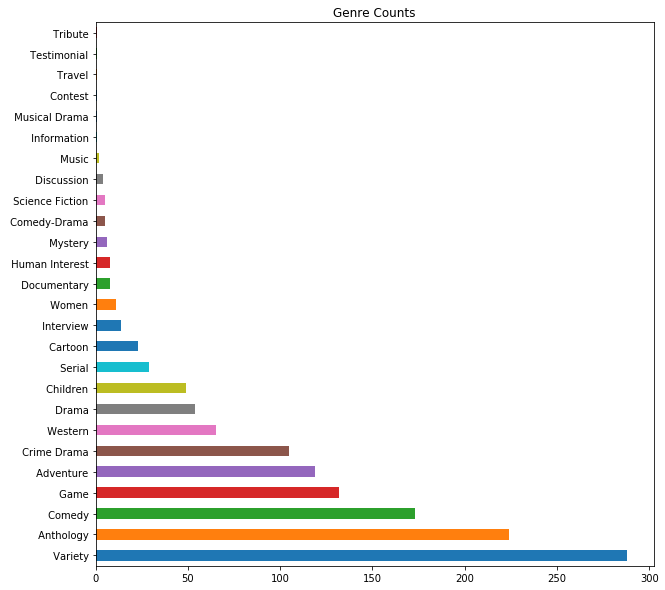

In [6]:
Fig1 = df.program_genre.value_counts().plot(kind='barh', figsize=(10,10), title='Genre Counts');

In [202]:
Fig1.figure.savefig('genre_counts.png')

## Creating the Subset for Analysis

Using pandas we will now be able to cull out a specific subset of the data for analysis. 

Using Boolean Indexing and String Handling, we can create a new dataframe 'adv' that includes only those programs whose genre field contains "Adventure" or "Action" and whose program_genre field is "Adventure".

This gives us a new data frame of only action adventure programs to work with in analysis.

In [71]:
## using boolean indexing and string handling to create subset

adv = df[(df.genre.str.contains('Adventure', na=False)) | (df.genre.str.contains('Action', na=False)) | (df.program_genre == 'Adventure')]

In [81]:
## we can see, using .info and .shape; the contours of our new subset data frame
## adv.info
## adv.shape, (124,14)

## now using sort values, and stipulating only our conditional series from the srting handling, we should be able to quickly verify our results

adv.sort_values('first_air_year', ascending=True) [['realtitle', 'program_genre', 'first_air_year', 'genre']]

,realtitle,program_genre,first_air_year,genre
932,Captain Video and His Video Rangers.,Science Fiction,1949.0,[ 'Action' 'Adventure' 'Family' 'Sci-Fi']
931,Captain Video and His Video Rangers.,Science Fiction,1949.0,[ 'Action' 'Animation' 'Family' 'Sci-Fi']
631,Follow That Man.,Crime Drama,1949.0,[ 'Action' 'Crime' 'Drama' 'Thriller']
632,Man Against Crime.,Crime Drama,1949.0,[ 'Action' 'Crime' 'Drama' 'Thriller']
625,"Rocky King, Inside Detective.",Crime Drama,1950.0,[ 'Action' 'Crime' 'Drama' 'Mystery']
100,"Tom Corbett, Space Cadet.",Adventure,1950.0,[ 'Action' 'Adventure' 'Drama' 'Sci-Fi' 'Thril...
624,Inside Detective.,Crime Drama,1950.0,[ 'Action' 'Crime' 'Drama' 'Mystery']
71,Space Patrol.,Adventure,1950.0,[ 'Action' 'Adventure' 'Sci-Fi']
52,Ding Howe and the Flying Tigers.,Adventure,1950.0,[ 'Action' 'Adventure' 'Drama' 'Family' 'War']
116,The Adventures of Dr. Fu Manchu.,Adventure,1950.0,['Adventure']


### Exporting the Subset for For Coding

We can now export the subset of the data, and code it qaulitatively for working class content.

To export our new subset data frame as a .csv file we use: *adv.to_csv('adv.csv', encoding='utf-8')*

In [82]:
adv.to_csv('adv.csv', encoding='utf-8')

## Coding For Working Class Content

To code the television programs in our subset, we developed a taxonomy for descriptive assessments of both occupations, and settings depicted in the programs. 

After assigning these descriptive categories, we then evaluated each show on a binary scale for whether it contained working-class content or not. 

The following tables show our taxonomy for this work:

**ADD in tables using mark down**

In [44]:
adv_c=pd.read_csv("/Users/user/Desktop/megaText/analysis/adv_c.csv")

In [52]:
adv_c.sort_values('first_air_year', ascending=True)[['realtitle', 'first_air_year', 'setting_type', 'occupation_type', 'evaluation_id']]

,realtitle,first_air_year,setting_type,occupation_type,evaluation_id
0,Follow That Man.,1949,New York City,Detective,2
1,Man Against Crime.,1949,New York City,Detective,2
2,Captain Video and His Video Rangers.,1949,Sci-Fi Fantasy,Crime Solving (informal),1
3,Captain Video and His Video Rangers.,1949,Sci-Fi Fantasy,Crime Solving (informal),1
4,Ding Howe and the Flying Tigers.,1950,Particular Country (not US),Military,2
5,Space Patrol.,1950,Sci-Fi Fantasy,Military,2
6,"Tom Corbett, Space Cadet.",1950,Sci-Fi Fantasy,Military,1
7,The Adventures of Dr. Fu Manchu.,1950,Detective,Particular Country (not US),1
8,The Adventures of Cyclone Malone.,1950,Western,Crime Solving (informal),1
9,Inside Detective.,1950,New York City,Detective,2


In [58]:
adv_c.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 20 columns):
Unnamed: 0             124 non-null int64
realtitle              124 non-null object
program_type           124 non-null object
program_genre          124 non-null object
network                121 non-null object
program_description    124 non-null object
first_air_year         124 non-null int64
last_air_year          62 non-null float64
genre                  124 non-null object
plot                   48 non-null object
trivia                 124 non-null object
program_title          124 non-null object
movie_id               124 non-null int64
kind_id                124 non-null int64
title                  124 non-null object
setting_type           120 non-null object
setting_id             120 non-null float64
occupation_type        115 non-null object
occupation_id          115 non-null float64
evaluation_id          124 non-null int64
dtypes: float64(3), int64(5), object(12

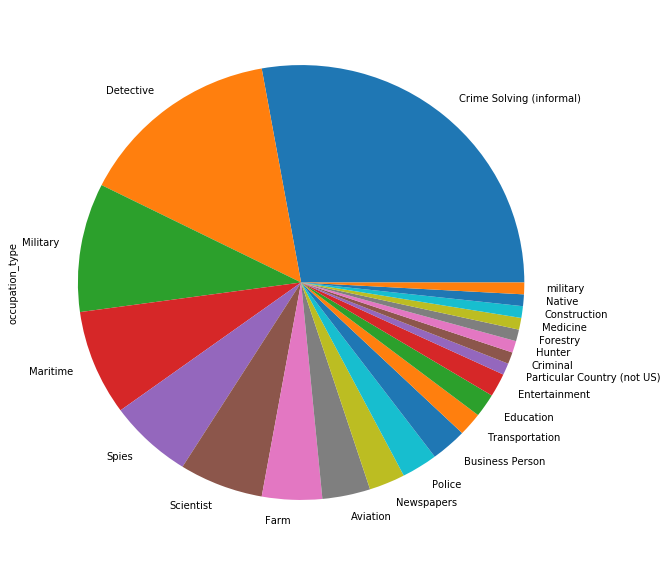

In [46]:
##need to clean adv_c.csv for errors

adv_c.occupation_type.value_counts().plot(kind='pie', figsize=(10,10));

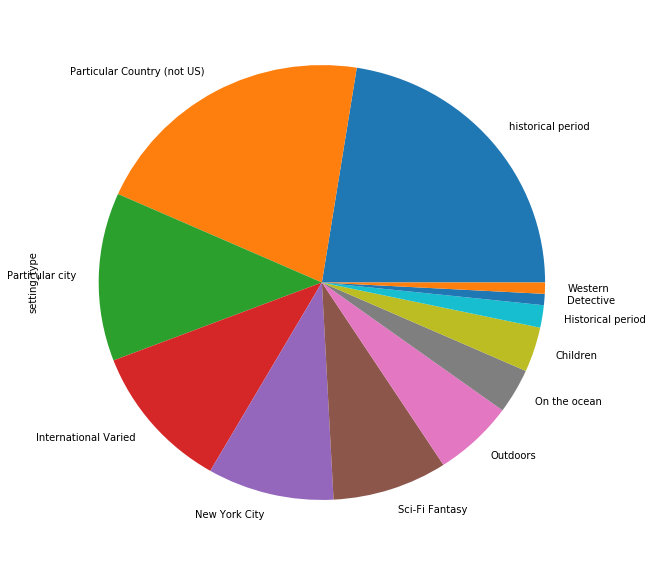

In [62]:
adv_c.setting_type.value_counts().plot(kind='pie', figsize=(10,10));

In [121]:
## add note explaining what this is
wc_set = adv_c.groupby('setting_type')['evaluation_id'].value_counts().unstack().fillna(0).astype(int)
wc_set.sort_values(2, ascending=False)

evaluation_id,1,2
setting_type,,
historical period,15,12
Particular Country (not US),17,8
Particular city,9,6
New York City,6,5
Outdoors,2,5
Historical period,0,2
International Varied,11,2
On the ocean,3,1
Sci-Fi Fantasy,9,1


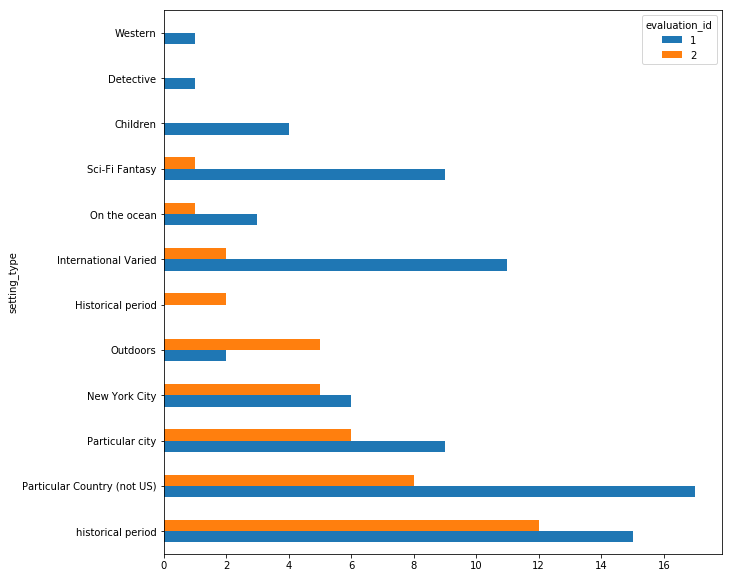

In [127]:
wc_set.sort_values(2, ascending=False).plot(kind= 'barh', figsize= (10,10));

In [124]:
## add note explaining what this is
wc_occ = adv_c.groupby('occupation_type')['evaluation_id'].value_counts().unstack().fillna(0).astype(int)
wc_occ.sort_values(2, ascending=False)

evaluation_id,1,2
occupation_type,,
Crime Solving (informal),21,11
Detective,12,5
Military,7,4
Maritime,6,3
Farm,2,3
Police,0,3
Transportation,0,2
Aviation,2,2
Entertainment,0,2


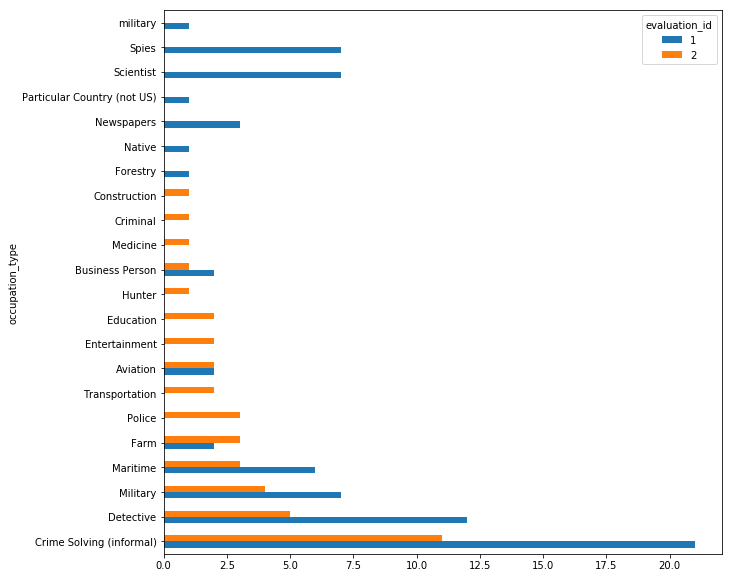

In [129]:
wc_occ.sort_values(2, ascending=False).plot(kind='barh', figsize=(10,10));

# Genre Line Plot Problem Below

In [24]:
## need to limit this by top ten most prevalent genres

gen_decade = df.groupby('first_air_year')['program_genre'].value_counts().unstack().fillna(0).astype(int)
gen_decade

program_genre,Adventure,Anthology,Cartoon,Children,Comedy,Comedy-Drama,Contest,Crime Drama,Discussion,Documentary,...,Musical Drama,Mystery,Science Fiction,Serial,Testimonial,Travel,Tribute,Variety,Western,Women
first_air_year,,,,,,,,,,,,,,,,,,,,,
1947.0,0,2,0,4,1,0,0,0,0,0,...,0,2,0,0,0,0,0,1,0,0
1948.0,0,6,0,2,2,0,0,0,0,0,...,0,0,0,0,1,0,0,10,0,1
1949.0,0,8,2,6,7,3,0,7,1,0,...,0,0,2,1,0,0,0,32,1,2
1950.0,5,25,1,17,14,0,0,13,1,0,...,0,0,1,3,0,0,0,66,2,2
1951.0,6,17,0,6,16,0,0,15,2,1,...,0,1,0,3,0,0,0,35,4,0
1952.0,11,26,0,3,20,1,0,5,0,2,...,1,0,1,1,0,0,1,20,1,1
1953.0,9,21,1,2,19,0,0,5,0,0,...,0,0,1,4,0,0,0,21,3,1
1954.0,13,29,0,2,18,1,0,3,0,1,...,0,1,0,10,0,0,0,19,1,2
1955.0,13,27,2,4,27,0,0,5,0,1,...,0,0,0,0,0,0,0,24,10,2


In [ ]:
## this doesn't work -- trying to create line plot of 10 most prevalent genres, grouped by first_air_year across the decade

gen_decade_trim = gen_decade.drop(columns=['program_genre','Contest', 'Serial', 'Discussion', 'Cartoon', 'Interview', 'Women', 'Documentary', 'Human Interest', 'Mystery','Comedy-Drama', 'Music', 'Tribute', 'Travel', 'Musical Drama', 'Information', 'Testimonial'])

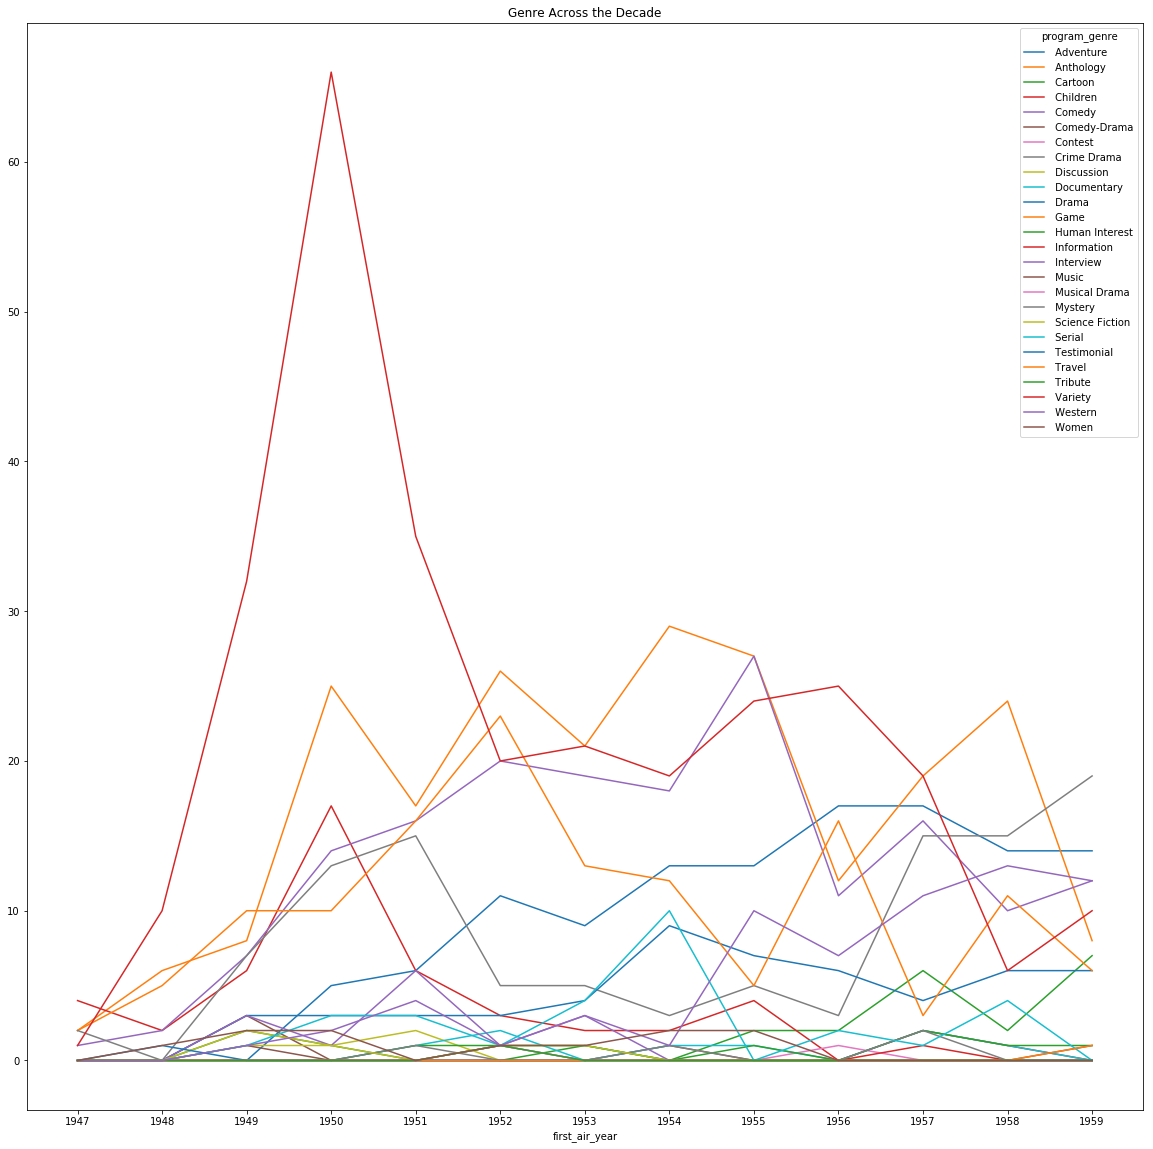

In [26]:
gen_decade.plot(xticks=([1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959]),\
                title='Genre Across the Decade', figsize=(20,20))